#### Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
# checking null values
train.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [5]:
test.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

In [6]:
X_train = train.drop(['Hardness'], axis=1)
y_train = train['Hardness']

In [7]:
X_train.shape, y_train.shape

((10407, 12), (10407,))

#### Exploratory Data Analysis

In [8]:
import seaborn as sns

In [9]:
X_train.shape, y_train.shape

((10407, 12), (10407,))

<Axes: xlabel='zaratio_Average', ylabel='Hardness'>

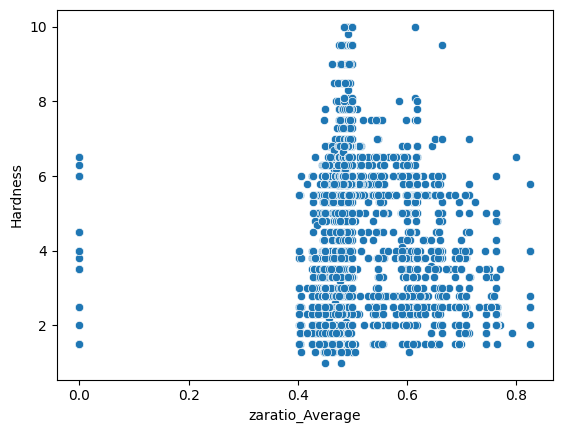

In [10]:
sns.scatterplot(x=X_train.iloc[:,10], y=y_train)

In [11]:
#No linear correlation between attributes

#### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
#Convert to numpy arrays
X_train = X_train.values
y_train = y_train.values

C:\Users\LoG1c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


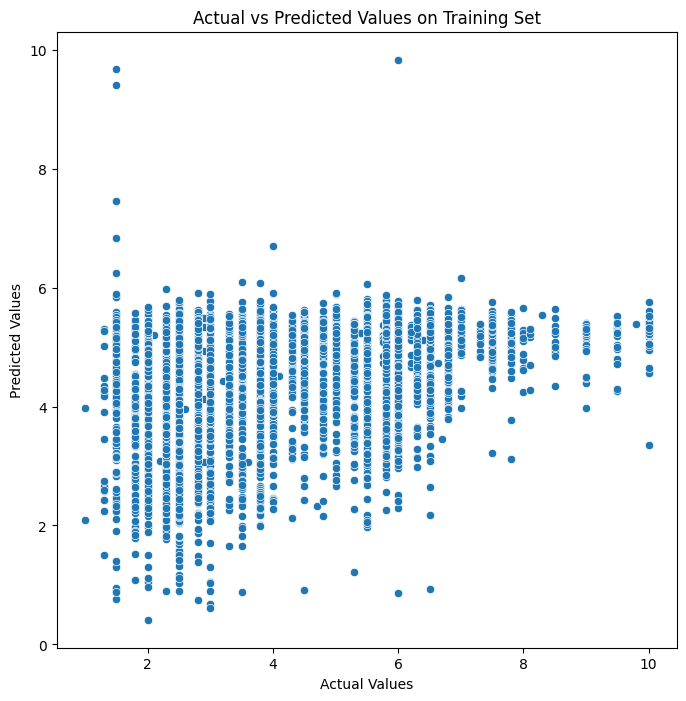

In [16]:
# Get predictions on the training set
y_train_pred = model.predict(X_train)

# Create a scatter plot of the actual vs predicted values on the training set
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten())
plt.title('Actual vs Predicted Values on Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error

In [18]:
print("R2 Score : {}\nMean Absolute Error : {}".format(r2_score(y_true=y_train, y_pred=y_train_pred), mean_absolute_error(y_true=y_train, y_pred=y_train_pred)))

R2 Score : 0.24506540111080055
Mean Absolute Error : 1.1762107573472682


In [19]:
y_pred = model.predict(test)

In [20]:
output = pd.DataFrame({'id': test['id'], 'Hardness': y_pred}, index=None)

In [21]:
output.head()

,id,Hardness
0,10407,3.460570
1,10408,4.819538
2,10409,5.267147
3,10410,5.259226
4,10411,5.078319


In [22]:
output.drop(output.columns[0], axis=1, inplace=True)

In [23]:
output.to_csv("./output.csv")

#### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model = DecisionTreeRegressor()

In [26]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

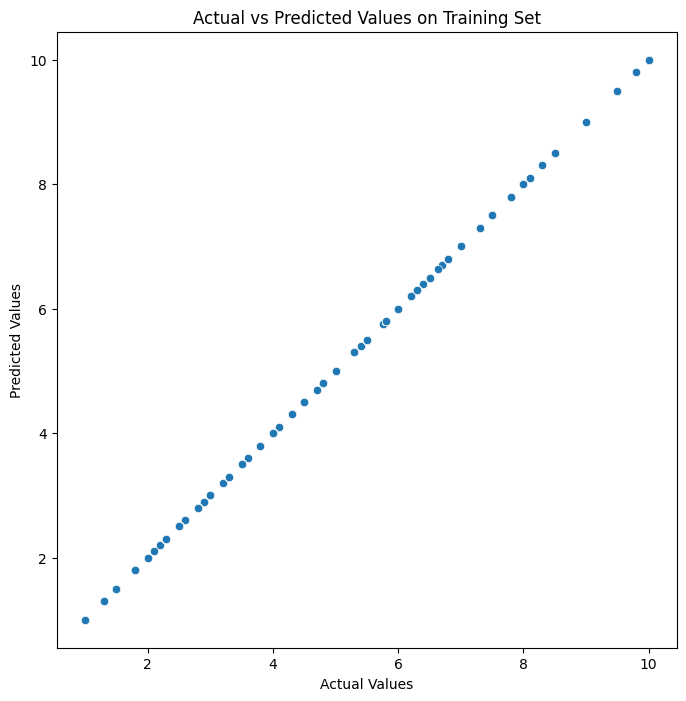

In [27]:
# Get predictions on the training set
y_train_pred = model.predict(X_train)

# Create a scatter plot of the actual vs predicted values on the training set
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten())
plt.title('Actual vs Predicted Values on Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [28]:
print("R2 Score : {}\nMean Absolute Error : {}".format(r2_score(y_true=y_train, y_pred=y_train_pred), mean_absolute_error(y_true=y_train, y_pred=y_train_pred)))

R2 Score : 1.0
Mean Absolute Error : 4.56592153876782e-18


In [29]:
y_pred = model.predict(test)

C:\Users\LoG1c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [30]:
output = pd.DataFrame({'id': test['id'], 'Hardness': y_pred}, index=None)

In [31]:
output.to_csv("output1.csv")

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
forest = RandomForestRegressor(criterion="absolute_error",n_estimators=20)

In [34]:
forest.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=20)

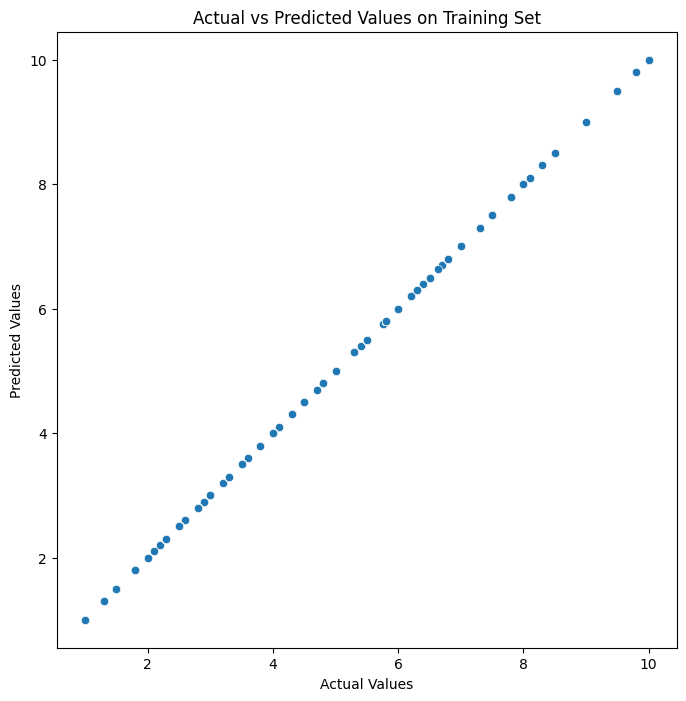

In [35]:
# Get predictions on the training set
y_train_pred = model.predict(X_train)

# Create a scatter plot of the actual vs predicted values on the training set
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten())
plt.title('Actual vs Predicted Values on Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [36]:
print("R2 Score : {}\nMean Absolute Error : {}".format(r2_score(y_true=y_train, y_pred=y_train_pred), mean_absolute_error(y_true=y_train, y_pred=y_train_pred)))

R2 Score : 1.0
Mean Absolute Error : 4.56592153876782e-18


In [37]:
y_pred = forest.predict(test)

C:\Users\LoG1c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [38]:
output = pd.DataFrame({'id': test['id'], 'Hardness': y_pred}, index=None)

In [39]:
output.to_csv("./output2.csv")

#### Support Vector Regression

In [40]:
from sklearn.svm import LinearSVR

In [47]:
support_linear = LinearSVR(dual='auto',max_iter=100000)

In [48]:
support_linear.fit(X_train,y_train)
# Get predictions on the training set
y_train_pred = support_linear.predict(X_train)
print("R2 Score : {}\nMean Absolute Error : {}".format(r2_score(y_true=y_train, y_pred=y_train_pred), 
                                                    mean_absolute_error(y_true=y_train, y_pred=y_train_pred)))
    

R2 Score : -0.13842211621215483
Mean Absolute Error : 1.445793745120527


C:\Users\LoG1c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
# Linear model failed to converge

In [63]:
from sklearn.svm import SVR

In [64]:
support_poly_2 = SVR(kernel='poly',degree=2)
support_poly_3 = SVR(kernel='poly',degree=3)
support_rbf = SVR(kernel='rbf')
support_sigmoid = SVR(kernel='sigmoid')

In [65]:
kernels = [support_poly_2,support_poly_3,support_rbf,support_sigmoid]

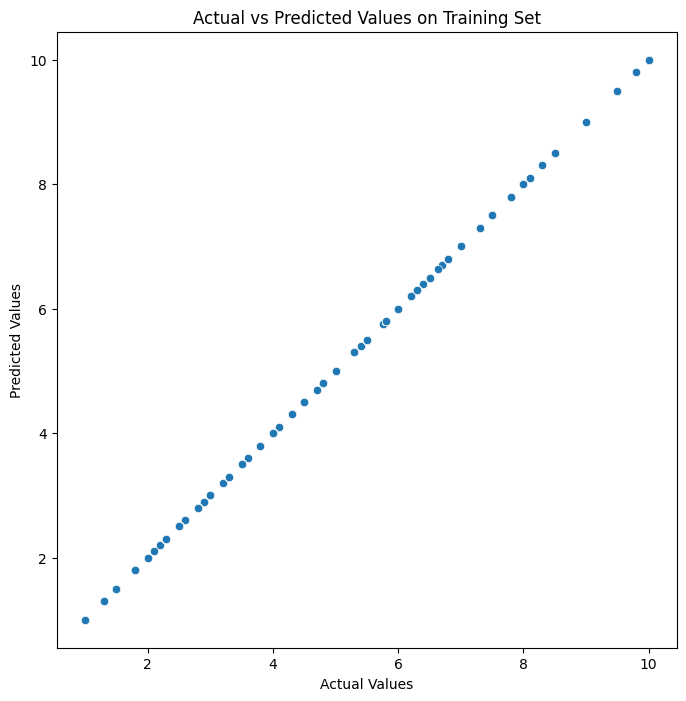

Kernel : SVR(degree=2, kernel='poly')
R2 Score : 1.0
Mean Absolute Error : 4.56592153876782e-18



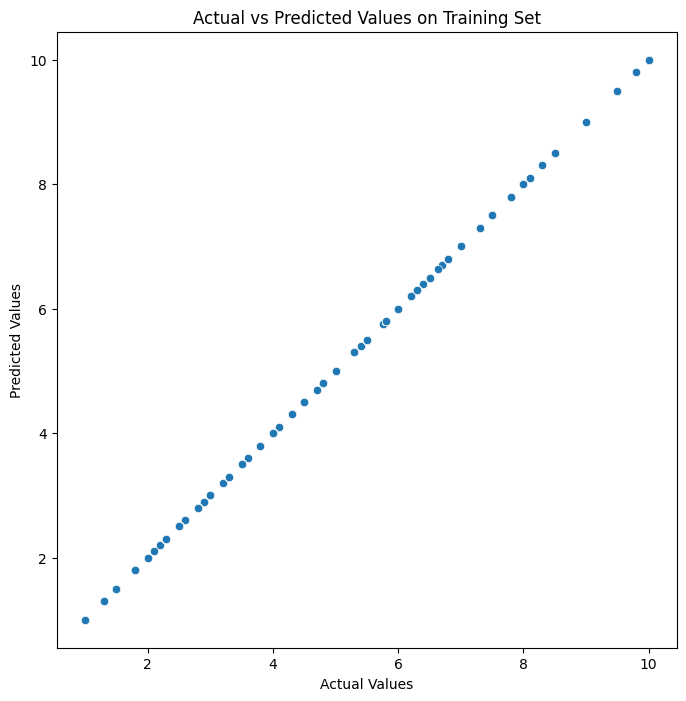

Kernel : SVR(kernel='poly')
R2 Score : 1.0
Mean Absolute Error : 4.56592153876782e-18



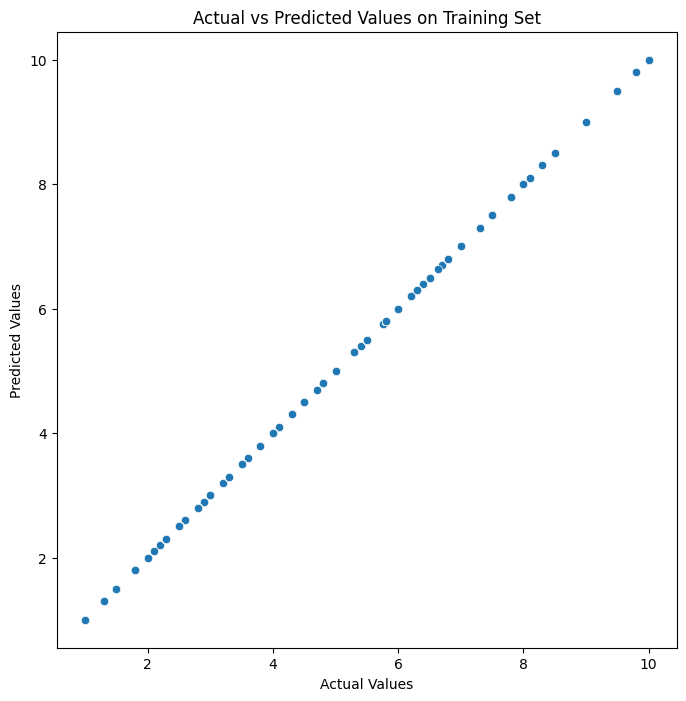

Kernel : SVR()
R2 Score : 1.0
Mean Absolute Error : 4.56592153876782e-18



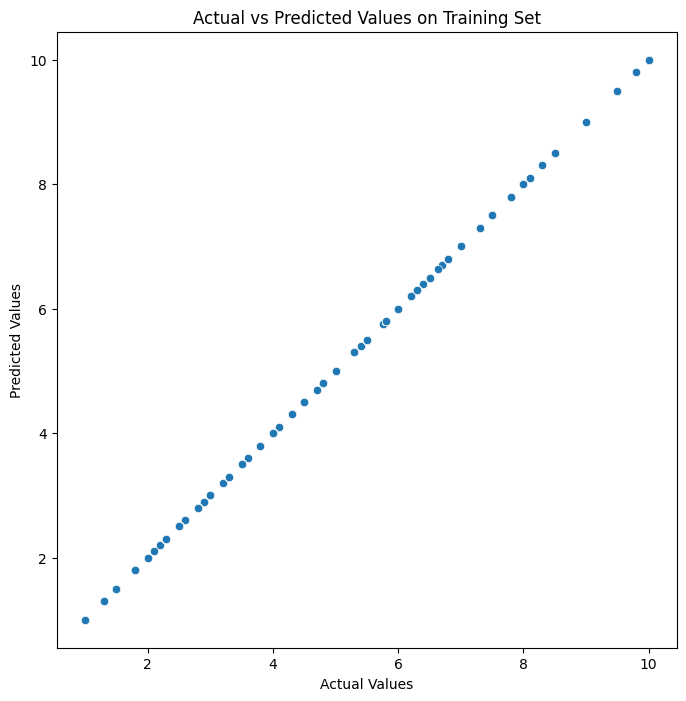

Kernel : SVR(kernel='sigmoid')
R2 Score : 1.0
Mean Absolute Error : 4.56592153876782e-18



In [66]:
for k in kernels:
    k.fit(X_train,y_train)
    # Get predictions on the training set
    y_train_pred = k.predict(X_train)
    # Get predictions on the training set
    y_train_pred = model.predict(X_train)

    # Create a scatter plot of the actual vs predicted values on the training set
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten())
    plt.title('Actual vs Predicted Values on Training Set')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()
    print("Kernel : {}\nR2 Score : {}\nMean Absolute Error : {}\n".format(k,
                                                                        r2_score(y_true=y_train, y_pred=y_train_pred), 
                                                                        mean_absolute_error(y_true=y_train, y_pred=y_train_pred)))
    

In [67]:
for k in kernels:
    y_pred = k.predict(test)
    output = pd.DataFrame({'id': test['id'], 'Hardness': y_pred}, index=None)
    output.to_csv("output1" + str(k) +".csv")

C:\Users\LoG1c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\LoG1c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\LoG1c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\LoG1c\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVR was fitted without feature names
  warning